In [1]:
from plotnine import *
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


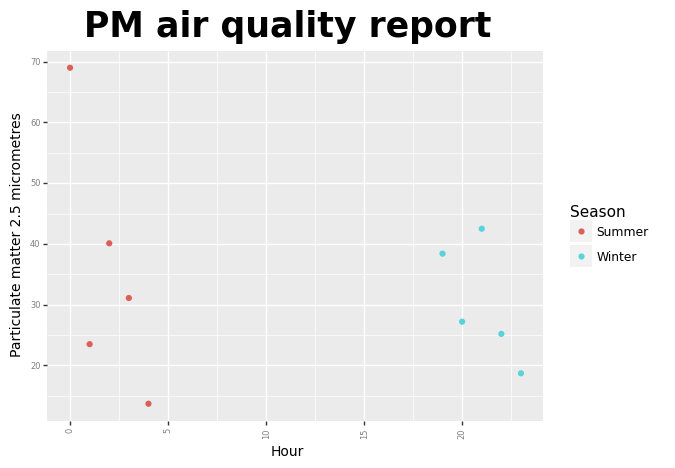

<ggplot: (124123940985)>

In [8]:
df = pd.read_csv('airq.csv', parse_dates=[0,1])
# df['Time'] = pd.to_datetime(df['Time'])
df.insert(0,'Season', 0)
summer = (df['Date'].dt.month > 3) & (df['Date'].dt.month < 9)
df['Season'] = df.where(summer, other='Winter')
df['Season'] = df.where(~summer, other='Summer')
df['Hour'] = df['Time'].dt.hour
df = df.groupby(['Hour', 'Season']).mean().reset_index()
custom_axis = theme(axis_text_x = element_text(color="grey", size=6, angle=90, hjust=.3),
                    axis_text_y = element_text(color="grey", size=6), 
                    plot_title = element_text(size = 25, face = "bold"), 
                    axis_title = element_text(size = 10)  
                    ) 
(
    ggplot(data = df, mapping = aes(x='Hour', y='PM25',
                          color='Season')) + geom_point() +
    custom_axis + ylab("Particulate matter 2.5 micrometres") + xlab("Hour") + labs(title="PM air quality report")
)

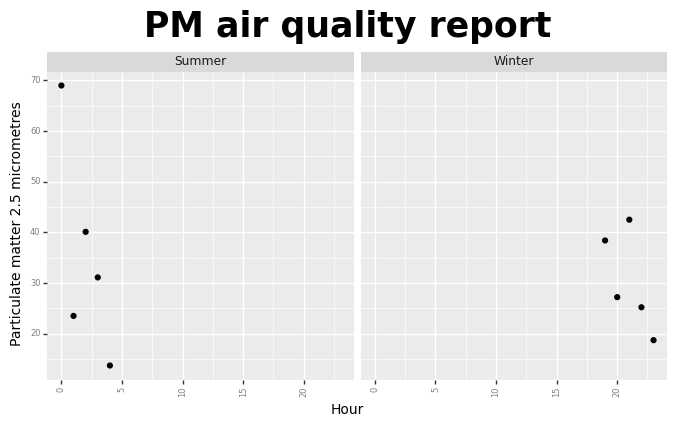

<ggplot: (124123962456)>

In [9]:
custom_axis = theme(axis_text_x = element_text(color="grey", size=6, angle=90, hjust=.3),
                    axis_text_y = element_text(color="grey", size=6), 
                    plot_title = element_text(size = 25, face = "bold"), 
                    axis_title = element_text(size = 10), 
                    panel_spacing_y=.4, 
                    figure_size=(8, 4) 
                    ) 

(
    ggplot(data = df, mapping = aes(x='Hour', y='PM25')) + geom_point(alpha=1) + facet_wrap('Season') + 
    custom_axis + ylab("Particulate matter 2.5 micrometres") + xlab("Hour") + labs(title="PM air quality report")
)